All required imports

In [1]:
import numpy as np
import matplotlib as plt
import sklearn
import os
import pandas as pd
import keras

Using TensorFlow backend.
C:\Users\prajw\Anaconda3\envs\mlproj\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\prajw\Anaconda3\envs\mlproj\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\prajw\Anaconda3\envs\mlproj\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\prajw\Anaconda3\envs\mlproj\lib\sit

This loads data into pandas dataframes

In [2]:
def get_data():
    try:
        root
    except:
        root = os.getcwd()

    data_path = os.path.join(root, "../skin-cancer-mnist-ham10000")

    # the associated meta data
    metadata = pd.read_csv(os.path.join(data_path, "HAM10000_metadata.csv"))

    # the pixels RGB
    X_pixels = pd.read_csv(os.path.join(data_path, "hmnist_28_28_RGB.csv"))
    
    return metadata, X_pixels
    
metadata, X_pixels = get_data()

In [3]:
print(metadata.shape)
metadata.head()

(10015, 7)


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [4]:
print(X_pixels.shape)
X_pixels.drop(['label'], axis=1,inplace = True)
X_pixels.head()

(10015, 2353)


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,192,153,193,195,155,192,197,154,185,202,...,134,173,124,138,183,147,166,185,154,177
1,25,14,30,68,48,75,123,93,126,158,...,82,60,39,55,25,14,28,25,14,27
2,192,138,153,200,145,163,201,142,160,206,...,149,167,129,143,159,124,142,136,104,117
3,38,19,30,95,59,72,143,103,119,171,...,73,44,26,36,25,12,17,25,12,15
4,158,113,139,194,144,174,215,162,191,225,...,201,209,166,185,172,135,149,109,78,92


Reformat metadata into X_metadata, categorical variables turned into one hot encoding, non-features removed.
Also make variable y into the classifications

In [5]:
X_metadata = metadata.loc[:, ['dx_type', 'age', 'sex', 'localization']]
X_metadata = pd.get_dummies(data=X_metadata, columns=['dx_type', 'sex', 'localization'])
X_metadata.head()

,age,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo,sex_female,sex_male,sex_unknown,localization_abdomen,localization_acral,...,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,75.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y = metadata.loc[:, 'dx']
y = pd.get_dummies(data=y, columns=['dx'])
y.head()

,akiec,bcc,bkl,df,mel,nv,vasc
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


Simply make X be the concatenation of X_pixels and X_metadata

In [7]:
X = pd.concat([X_metadata, X_pixels], axis = 1)
X.head()

,age,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo,sex_female,sex_male,sex_unknown,localization_abdomen,localization_acral,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,80.0,0,0,0,1,0,1,0,0,0,...,134,173,124,138,183,147,166,185,154,177
1,80.0,0,0,0,1,0,1,0,0,0,...,82,60,39,55,25,14,28,25,14,27
2,80.0,0,0,0,1,0,1,0,0,0,...,149,167,129,143,159,124,142,136,104,117
3,80.0,0,0,0,1,0,1,0,0,0,...,73,44,26,36,25,12,17,25,12,15
4,75.0,0,0,0,1,0,1,0,0,0,...,201,209,166,185,172,135,149,109,78,92


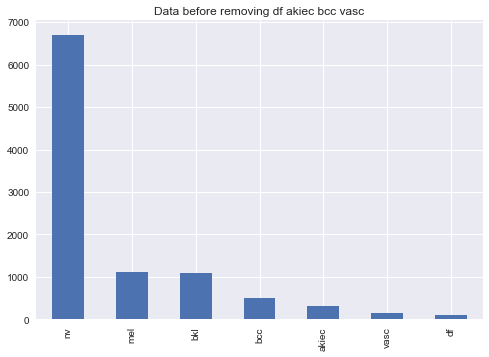

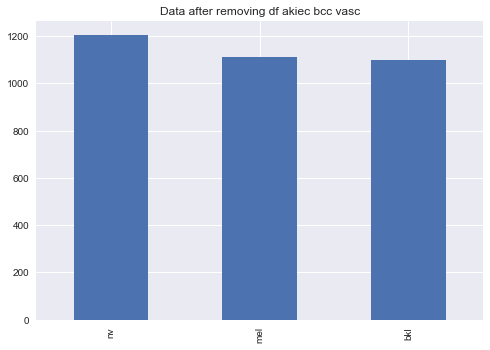

C:\Users\prajw\Anaconda3\envs\mlproj\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Classification Report
              precision    recall  f1-score   support

          nv       0.71      0.57      0.63       252
         mel       0.56      0.72      0.63       211
         bkl       0.78      0.73      0.76       221

    accuracy                           0.67       684
   macro avg       0.68      0.67      0.67       684
weighted avg       0.68      0.67      0.67       684

Accuracy 0.6695906432748538 



In [18]:
def pre_process(metadata, proportion, random_seed):    
    # convert strings to unique ints
    from sklearn import preprocessing as pp
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    
    # Convert strings to unique ints to pass into classifier
    le = pp.LabelEncoder()
    metadata['dx_type'].iloc[:] = le.fit_transform(metadata['dx_type']).astype(np.float64)
    metadata['sex'].iloc[:] = le.fit_transform(metadata['sex']).astype(np.float64)
    metadata['localization'].iloc[:] = le.fit_transform(metadata['localization']).astype(np.float64)
    
    # This code below is to reduce the size of nv to 1000 approx
#     graph = metadata['dx'].value_counts().plot.bar()
#     graph.set_title("Data before removing nv")
#     plt.show()
    
#     check = metadata.loc[metadata['dx'] == 'nv']
#     rand_samp = np.random.choice(check.index, size = 5500, replace = False)
#     check2 = metadata.drop(list(rand_samp), axis=0)
    
#     graph2 = check2['dx'].value_counts().plot.bar()
#     graph2.set_title("Data after removing nv")
#     plt.show()
    # End of segment
    
    
    # The code below is to remove the 4 labels with the lowest data
    graph = metadata['dx'].value_counts().plot.bar()
    graph.set_title("Data before removing df akiec bcc vasc")
    plt.show()
    
    check = metadata.loc[metadata['dx'].isin(['df', 'akiec', 'bcc', 'vasc'])]
    check = metadata.drop(check.index, axis=0)
    
    check2 = metadata.loc[metadata['dx'] == 'nv']
    rand_samp = np.random.choice(check2.index, size = 5500, replace = False)
    check2 = check.drop(list(rand_samp), axis=0)
    
    graph2 = check2['dx'].value_counts().plot.bar()
    graph2.set_title("Data after removing df akiec bcc vasc")
    plt.show()
    # End of segment
    
    # Separate data into segments
    data = check2['dx']
    bar_plot = data.value_counts()
    ids = check2[['lesion_id', 'image_id']]
    features = check2.drop(['lesion_id', 'image_id', 'dx'], axis=1)
    
    train_features, test_features, train_label, test_label = train_test_split(features, data, test_size=proportion, random_state=random_seed)
    
    return test_label.fillna(-1.0), test_features.fillna(-1.0), train_label.fillna(-1.0), train_features.fillna(-1.0)
    

def svm(metadata, size_of_test_data, random_seed):
    from sklearn.svm import SVC 
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import classification_report, confusion_matrix
    
    test_label ,test_features ,train_label ,train_features = pre_process(metadata, size_of_test_data, random_seed)
    svc = SVC()
    svc.fit(train_features, train_label)
    label_pred = svc.predict(test_features)

    # Store true vs pred labels
    label_map = test_label.index
    reverse = dict()
    for l in label_map:
        reverse[test_label.loc[l]] = l

    names = []
    for number in reverse:
        names.append(reverse[number])
        
    labels_named = [reverse[number] for number in test_label]
    ypred_named = [reverse[number] for number in label_pred]

    pred_df = pd.DataFrame()
    pred_df["y_true"] = labels_named
    pred_df["y_pred"] = ypred_named
    pred_df.to_csv("../Figures/praj_classifications.csv")
    
    conf_matrix = confusion_matrix(test_label, label_pred)
    print('\nClassification Report')
#     target = metadata['dx'].unique()
    target = ['nv', 'mel', 'bkl']
    classification_report = classification_report(test_label, label_pred, target_names=target) 
    print(classification_report)
    num_right = np.sum(test_label == label_pred)
    print(f"Accuracy {num_right / test_label.shape[0]} \n")
    
    
    return target, conf_matrix
       
#################
# Edit params here for SVM

size_of_test_data = 0.2
random_seed = 42

#################
    
    
labels, conf_matrix = svm(metadata, size_of_test_data, random_seed)

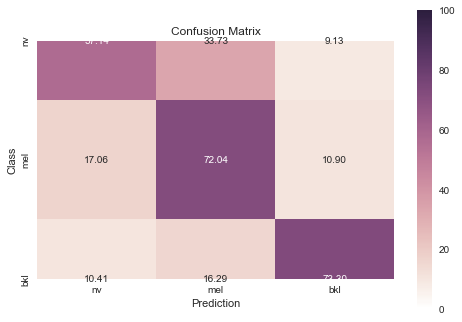

In [19]:
def plot_conf_matrix(conf_matrix, labels):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sn
    import pandas as pd
    import seaborn as sns
    import math
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib as mpl

    plt.style.use('seaborn')
    conf_arr = conf_matrix

    s = conf_arr.sum(axis = 1)
    conf_arr = (conf_arr * 100.0) / s[:,None]
    conf_arr = np.nan_to_num(conf_arr)
    df_cm = pd.DataFrame(conf_arr, 
      index = labels,
      columns = labels)
    
    fig = plt.figure()
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    res = sn.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap=cmap)

    plt.yticks(np.arange(len(labels)) + .5, labels,va='center')
    plt.title('Confusion Matrix')
    plt.xlabel("Prediction")
    plt.ylabel("Class")
    plt.savefig('../Figures/confusion_matrix_svm.png', dpi=100, bbox_inches='tight' )
    plt.show()
    plt.close()
    
plot_conf_matrix(conf_matrix, labels)